In [113]:
X_ = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
Y_ = [-6, 1, -2, 4, -1, 0, 0, 5, -1, 7, 10]
Z_ = [[1, 2, 3], [3, 2, 4], [-2, 10, 4]]
Y_2 = [0, -5, 3]

In [183]:
def linear_regression(X, Y):
    alpha_ = alpha(X, Y)
    beta_ = beta(X, Y)
    Y_pred = []
    
    for i in range(0, len(Y)):
        if(isinstance(X[0], list)):
            Y_pred.append(alpha_ + sum([beta_[j]*X[j][i] for j in range(0, len(beta_))]))
        else:
            Y_pred.append(alpha_ + beta_*X[i])
    return Y_pred

def beta(X, Y):
    beta = []
    if(isinstance(X[0], list)):
        return [cov(col, Y)/variance(col) for col in X]
    else:
        return cov(X, Y)/variance(X)
    #beta.append([cov(X[col][:], Y)/(variance(X[col][:])) for col in X])

def alpha(X, Y):
    if(isinstance(X[0], list)):
        return mean(Y) - sum([beta(col, Y)*mean(col) for col in X])
    else:
        return mean(Y) - beta(X, Y)*mean(X)

def mean(Z):
    if(isinstance(Z[0], list)):
        mu_z = [sum(col)/len(col) for col in Z]
    else:
        mu_z = sum(Z)/len(Z)
    return mu_z

def std(Z):
    import math
    return math.sqrt(variance(Z))

def variance(Z):
    var_z = 0
    if(isinstance(Z[0], list)):
        N = len(Z)
        for i in range(0, N):
            for j in range(0, N):
                var_z += cov(Z[i], Z[j])
    else:
        var_z = cov(Z, Z)
    return var_z

def cov(X, Y):
    X_bar = mean(X)
    Y_bar = mean(Y)
    cov = []
    if(isinstance(Y[0], list)):
        print("Error: Y must be a 1-D list")
    elif(isinstance(X[0], list)):
        if(len(X[0]) != len(Y)):
            print("Error: Dimensionality mismatch")
        else:
            N = len(X)
            k = len(Y)
            for i in range(0, N):
                for j in range(0, k):
                    cov[i] = (1/(k-1))*sum([(X[i][j] - X_bar[i])*(Y[j] - Y_bar)])
    else:
        N = len(X)
        cov = (1/(N-1))*sum([(X[i] - X_bar)*(Y[i] - Y_bar) for i in range(0, N)])
    return cov

def corr(X, Y):
    N_X = N_Y = 1
    if(isinstance(X[0], list)):
        N_X = len(X)
    if(isinstance(Y[0], list)):
        N_Y = len(Y)
    corr = [[0 for i in range(0, N_X+N_Y)] for j in range(0, N_X+N_Y)]
    print(corr)
    mat = []
    if(isinstance(X[0], list)):
        for col in X.copy():
            mat.append(col)
    else:
        mat.append(X.copy())
    mat.append(Y.copy())
    for i in range(0, len(mat)):
        for j in range(0, len(mat)):
            print(mat[i], mat[j])
            corr[i][j] = cov(mat[i], mat[j])/(std(mat[i])*std(mat[j]))
    return corr

def r_2(X, Y):
	if(isinstance(Y[0], list)):
		print("Y must be a 1D array")
	elif(isinstance(X[0], list)):
		return [corr(col, Y)**2 for col in X]
	else:
		return corr(X, Y)**2

def mean(Z):
    if(isinstance(Z[0], list)):
        return [sum(col)/len(col) for col in Z]
    else:
        return sum(Z)/len(Z)

In [191]:
X = [[-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5], [-5, -4, -2, -2, -1, 10, 1, 4, 3, 4, 5]]
Y = [-6, 1, -2, 4, -1, 0, 0, 5, -1, 7, 10]
Y_pred_1 = linear_regression(X, Y)
print(Y_pred_1)

[-6.456266907123536, -4.970694319206493, -2.9995491433724077, -1.9995491433724077, -0.5139765554553654, 5.827321911632101, 2.4571686203787197, 4.913886384129847, 5.428313796212804, 6.913886384129847, 8.39945897204689]


In [188]:
X = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
Y = [-6, 1, -2, 4, -1, 0, 0, 5, -1, 7, 10]
Y_pred = linear_regression(X, Y)
print(Y_pred)

[-3.4545454545454546, -2.4545454545454546, -1.4545454545454546, -0.4545454545454546, 0.5454545454545454, 1.5454545454545454, 2.5454545454545454, 3.5454545454545454, 4.545454545454545, 5.545454545454545, 6.545454545454545]


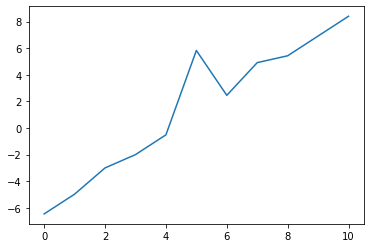

In [190]:
import matplotlib.pyplot as plt
plt.plot(Y_pred_1)

In [184]:
Y_hat = []
err = 0
for i in range(0, len(X)):
    Y_hat.append(X[i]+1.54545)
    err += Y_pred[i]-Y_hat[i]
print(err)

TypeError: can only concatenate list (not "float") to list